In [1]:
import numpy as np
import matplotlib.pyplot as plt
from controller import Controller

In [42]:
lr = [0.01, 0.05, 0.1, 0.2, 0.9]
eta = 0.7
init_state = (0, 15)
blocks = [(1, 2), (2, 1)]
mouse_pattern = "away"
board_size = (4, 4)
eps = 0.2
max_iter = 2000

In [43]:
total_rewards = {

}

In [44]:
for l in lr:
    print(l)
    c = Controller(
        board_size=board_size,
        init_state=init_state,
        blocks=blocks,
        eps=eps,
        mouse_move="mouse_pattern"
    )
    total_rewards[l] = c.q_learning(lr=l, eta=eta, max_iter=max_iter, print_msg=False)

0.01
0.05
0.1
0.2
0.9


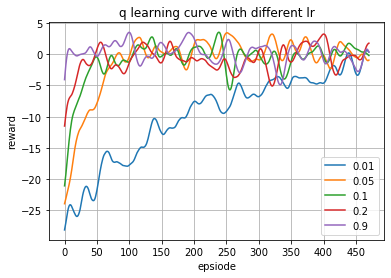

In [45]:
iters = 500
N = 30
weights = np.hanning(N)
weights = weights / np.sum(weights)
for l in total_rewards:
    r = np.array(total_rewards[l][:iters])
    r = np.convolve(weights, r)[N-1: -N+1]
    plt.plot(range(len(r)), r, label=str(l))
plt.grid("on")
plt.xticks(range(0, len(r), 50))
plt.xlabel("epsiode")
plt.ylabel("reward")
plt.title(f"q learning curve with different lr")
plt.legend()

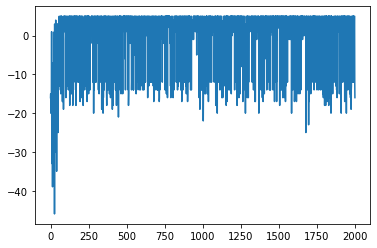

In [31]:
plt.plot(total_rewards[0.1])

In [52]:
lr = 0.1
etas = [0.1, 0.3, 0.5, 0.7, 0.9]
init_state = (0, 15)
blocks = [(1, 2), (2, 1)]
mouse_pattern = "away"
board_size = (4, 4)
eps = 0.2
max_iter = 2000

In [53]:
total_rewards = {}
for eta in etas:
    print(eta)
    c = Controller(
        board_size=board_size,
        init_state=init_state,
        blocks=blocks,
        eps=eps,
        mouse_move="mouse_pattern"
    )
    total_rewards[eta] = c.q_learning(lr=lr, eta=eta, max_iter=max_iter, print_msg=False)

0.1
0.3
0.5
0.7
0.9


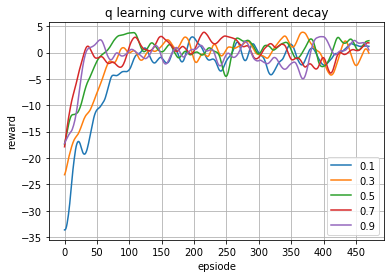

In [55]:
iters = 500
N = 30
weights = np.hanning(N)
weights = weights / np.sum(weights)
for l in total_rewards:
    r = np.array(total_rewards[l][:iters])
    r = np.convolve(weights, r)[N-1: -N+1]
    plt.plot(range(len(r)), r, label=str(l))
plt.grid("on")
plt.xticks(range(0, len(r), 50))
plt.xlabel("epsiode")
plt.ylabel("reward")
plt.title(f"q learning curve with different decay")
plt.legend()

In [67]:
import pickle

with open("./c_dist.pkl", "rb") as f:
    c = pickle.load(f)
rewards = c.curve
N = 10000
weights = np.hanning(N)
weights = weights / np.sum(weights)
r = np.array(rewards)
r = np.convolve(weights, r)[N-1: -N+1]

with open("./c.pkl", "rb") as f:
    c2 = pickle.load(f)
rewards2 = c2.curve
r2 = np.array(rewards2)
r2 = np.convolve(weights, r2)[N-1: -N+1]

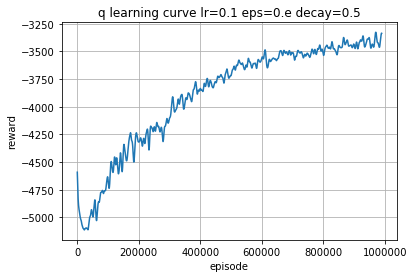

In [64]:
plt.plot(r, label="new reward")
plt.xlabel("episode")
plt.ylabel("reward")
plt.title("q learning curve lr=0.1 eps=0.e decay=0.5")
plt.grid("on")

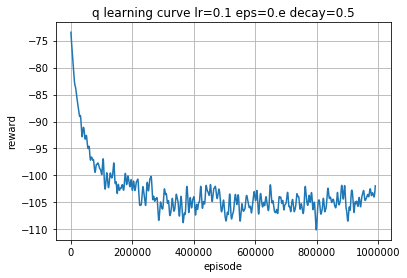

In [68]:
plt.plot(r2, label="basic reward")
plt.xlabel("episode")
plt.ylabel("reward")
plt.title("q learning curve lr=0.1 eps=0.e decay=0.5")
plt.grid("on")